In [17]:
from qiskit import *

from qiskit.visualization import plot_histogram

circuit = QuantumCircuit(2,2)

circuit.h(0)

circuit.cx(0,1)

circuit.measure([0,1], [0,1])


print(circuit)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


ibmqfactory.load_account:WARNING:2023-01-29 01:29:27,403: Credentials are already in use. The existing account in the session will be replaced.


63d6124c75f7ef4eed6cdb4d
Job Status: job has successfully run


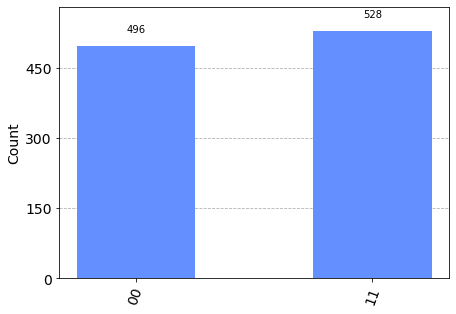

In [35]:
IBMQ.save_account('53fbe5f38c448c1c5d19a96fa47bd10ee765b1a9721453022212a2f5b3b29c0fb75a665962ef38dd5fde63cd26ddb2cd9d86fe78c9a37b947ff91e6bf911b0ea', overwrite=True)

IBMQ.load_account()

provider = IBMQ.get_provider(hub = 'ibm-q')

device = provider.backends()[0]

#device = provider.get_backend('ibm_oslo')


#get_backend('ibmq_16_melbourne')

job = execute(circuit,backend = device,shots = 1024)

print(job.job_id())

from qiskit.tools.monitor import job_monitor

job_monitor(job)

device_result = job.result()

plot_histogram(device_result.get_counts(circuit))